## 1. Import Necessary Libraries 

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2. Data Collection & Importing the data

In [2]:
newspaper_data = pd.read_csv("NewspaperData.csv")
newspaper_data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


## 3. Data Understanding

### 3.1 Perform Initial Analysis

In [3]:
newspaper_data.shape

(34, 3)

In [4]:
newspaper_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [5]:
newspaper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [6]:
newspaper_data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [7]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

### 3.2 Perform Assumptions Check

# ===========================================================

## 1. Linearity Test 

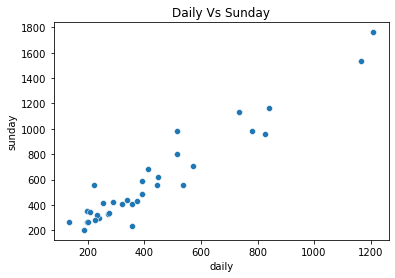

In [8]:
sns.scatterplot(x='daily',y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

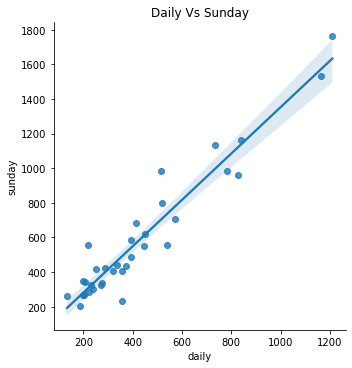

In [9]:
sns.lmplot(x='daily', y='sunday', data=newspaper_data)
plt.title("Daily Vs Sunday")
plt.show()

### Linearity Test is Failed

## 2. Normality Test

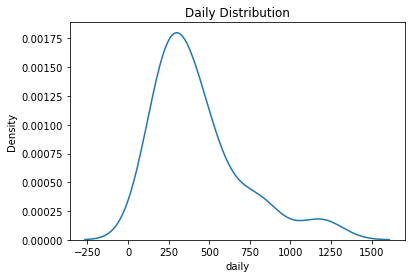

In [10]:
sns.distplot(a=newspaper_data['daily'],hist = False)
plt.title("Daily Distribution")
plt.show()

### Normality Test is Failed 

## 3. Multicollinerity Test

Here cannot be check because only one input.
So, Multicollinearity test is Pass

##  4. AutoRegession Test

Here we don't have input features with datetime datatype.
So, No AutoRegression

## 5. Homoscedasticity Test II 6. Zero Residual mean

This can be performed only after **Model Training**

# =============================================================

## 4. Data Preparation

In [11]:
newspaper_data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [12]:
# newspaper_data = newspaper_data.drop("Newspaper",axis =1).head()
del newspaper_data["Newspaper"]

In [13]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [14]:
newspaper_data.isna().sum()

daily     0
sunday    0
dtype: int64

In [15]:
newspaper_data.dtypes

daily     float64
sunday    float64
dtype: object

## 5. Model Building

Linear Regression model can be built by using any of the 2 libraries:

1. Statmodels
2. sklearn

### 1. Using statmodels

In [16]:
import statsmodels.formula.api as smf

In [17]:
linear_model = smf.ols(formula = "sunday~daily", data = newspaper_data)
linear_model

## 6. Model Training

In [18]:
linear_model = linear_model.fit()

In [19]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

## 7. Model Testing

### Manual Prediction

In [20]:
# y = mx+c
# If x=100 y= ??

(1.339715*100)+13.835630

147.80713

In [21]:
# y = mx+c
# If x=200 y= ??

(1.339715*200)+13.835630

281.77862999999996

In [22]:
# y = mx+c
# If x=300 y= ??

(1.339715*300)+13.835630

415.75012999999996

In [23]:
# y = mx+c
# If x=400 y= ??

(1.339715*400)+13.835630

549.72163

In [24]:
# y = mx+c
# If x=500 y= ??

(1.339715*500)+13.835630

683.69313

### Automatic Prediction

In [25]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [35]:
data_test = pd.DataFrame(data = {"daily":[100,200,300,400,500]})
data_test

,daily
0,100
1,200
2,300
3,400
4,500


In [36]:
linear_model.predict(data_test)

0    147.807106
1    281.778581
2    415.750057
3    549.721533
4    683.693009
dtype: float64

## 8. Model Evaluation

### ---------------PARK-----------------

## 9. Model Deployment

In [40]:
from pickle import dump

In [42]:
dump(linear_model,open('Newspaper_intell.pkl','wb'))

In [43]:
from pickle import load

In [45]:
loaded_itelligence_file = load(open('Newspaper_intell.pkl','rb'))

In [46]:
loaded_itelligence_file.predict(data_test)

0    147.807106
1    281.778581
2    415.750057
3    549.721533
4    683.693009
dtype: float64

# Conclusion

* Assumptions Tests are failed for this model.
* This Model is not good for the future prediction regarding the Sunday publications.
* So, we need some transformations or feature Engineering is needed here.

# THE END!!!!